# Problem Sheet 1

## Task 1: Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1a: $N$-alternating points problem

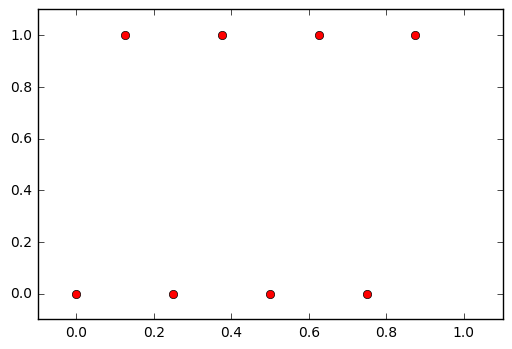

In [2]:
### Task 1a: $N$-alternating points problem
N = 3
x = np.linspace(0, 1-2**(-N), num=2**N)
y = np.empty((2**N,))
y[::2] = 0  # even entries are 0
y[1::2] = 1 # odd entries are 1

plt.plot(x,y, 'ro')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

### Task 1b: XOR problem
https://en.wikipedia.org/wiki/Exclusive_or

Page 166 of Deep Learning book by Goodfellow et al.

https://medium.com/@jayeshbahire/the-xor-problem-in-neural-networks-50006411840b

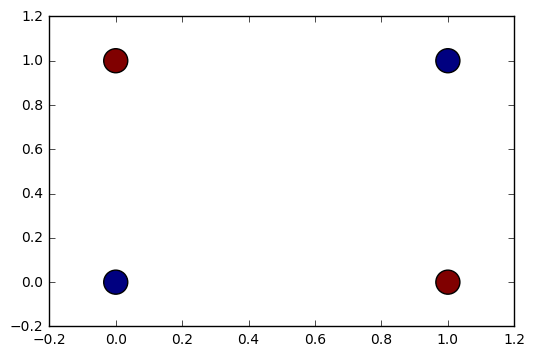

In [3]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])
plt.scatter(X[:,0],X[:,1], s = 300, c = y)
plt.show()

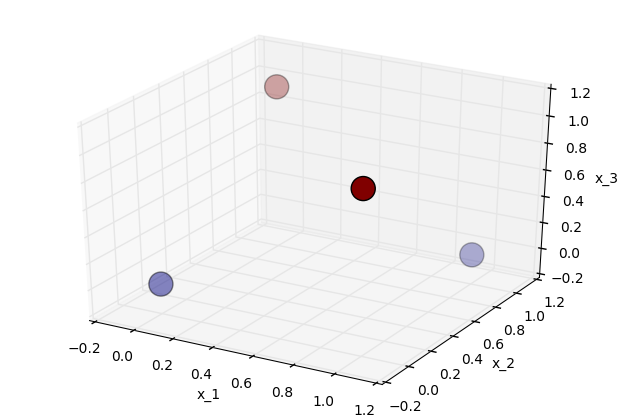

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x3 = [0, 1, 1, 0]
ax.scatter(X[:,0], X[:,1], x3,  s = 300, c = y)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
plt.show()

### Task 1c: MNIST
http://yann.lecun.com/exdb/mnist/

In [5]:
from torchvision import datasets
data = datasets.MNIST('data', train=True, download=True)
X_numpy = data.train_data.numpy()/255
y_numpy = data.train_labels.numpy()

def draw_MNIST(image, label = ''):
    # Take a numpy array of 784 entries
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.title(label)
    plt.show()

def onehot(integer_labels):
    #Return matrix whose rows are onehot encodings of integers.
    onehotL = np.zeros((len(integer_labels), len(np.unique(integer_labels))), dtype='uint8')
    onehotL[np.arange(len(integer_labels)), integer_labels] = 1
    return onehotL

X_numpy = X_numpy.reshape(60000,-1)
y_numpy = onehot(y_numpy)
print(X_numpy.shape, y_numpy.shape)

(60000, 784) (60000, 10)


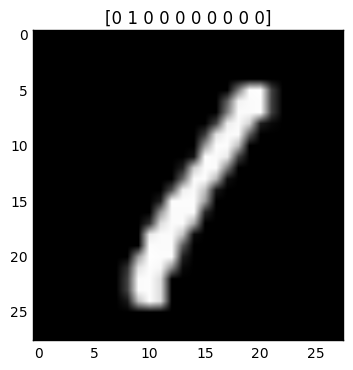

In [6]:
img_ind = 3
draw_MNIST(X_numpy[img_ind], y_numpy[img_ind])

## Task 2.iii (Split)

In [7]:
# Problem 2.iii (Split)
N_train = 40000
train_img = X_numpy[0:N_train,]
train_label = y_numpy[0:N_train,]
print(train_img.shape, train_label.shape)

test_img = X_numpy[N_train:,]
test_label = y_numpy[N_train:]
print(test_img.shape, test_label.shape)

(40000, 784) (40000, 10)
(20000, 784) (20000, 10)


In [8]:
# Task 2.iv
batch_size = 4
def mbatch_MNIST(img, label, ind):
    sample_img = img[ind,]
    sample_label = label[ind,]
    return (sample_img, sample_label)

ind = np.random.permutation(train_label.shape[0]).reshape(-1,batch_size)
print(ind[:4,])

[[13643 10383 30482 19726]
 [13129 22979 27932 28277]
 [19700 31563 34935 26913]
 [34766 35708   200 36820]]


(4, 784) (4, 10)


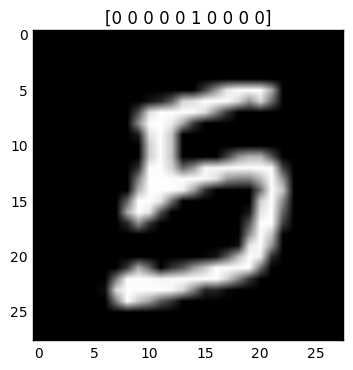

In [9]:
batch_number = 2
sample_number = 3
sample_img, sample_label = mbatch_MNIST(train_img, train_label, ind[batch_number])
print(sample_img.shape, sample_label.shape)
draw_MNIST(sample_img[sample_number,].reshape((28,28)), sample_label[sample_number,])

## Problem 3: Backpropagation ([source](http://neuralnetworksanddeeplearning.com/chap2.html))

Consider a dataset of $N$ labeled pairs $\left\{(x_i, y_i)\right\}_{i=1}^N$. Our goal is to learn a function such that $f(x) = y$.

Define a neural network with $L$ layers and activations $\sigma(\cdot)$ in-between. Output (i.e. activation) of $l^{th}$ layer can be written out as
$$
a_j^{(l)} = \sigma\left( \sum_{k=1}^{h_l} w_{j,k}^{(l)} a_k^{(l-1)} + b_j^{(l)} \right) = \sigma\left(\underbrace{W^{(l)} a^{(l-1)} + b^{(l)}}_{z^{(l)}}\right) = \sigma\left(z^{(l)}\right)
$$

<img align="center" src="https://i.imgur.com/l9K1Qk6.jpg" alt="net" width="600"/>

We would like to minimze a cost function, e.g. least squares error
$$
\min_{\Theta} = \frac{1}{2N} \sum_{i=1}^{N} \|a^{(L)} - y_i\|^2_2,
$$
and thus want to find $\frac{\partial C}{\partial w_{j,k}^{(l)}}$ and $\frac{\partial C}{\partial  b_j^{(l)}}$.
We introduce notation $\delta_j^{(l)} = \frac{\partial C}{\partial z_j^{(l)}}$.

Begin by looking at the final layer $(L)$
$$
\delta_j^{(L)} = \frac{\partial C}{\partial z_j^{(L)}} = \frac{\partial C}{\partial a_j^{(L)}} \sigma'(z_j^{(l)}) = \left(a_j^{(L)} - y_j\right)\sigma'(z_j^{(L)}),
$$
or using a Hadamard product $\odot$ (i.e. entry-wise multiplication) write it out in a vector form
$$
\delta^{(L)} = \nabla_{z^{(L)}} C = \nabla_{a^{(L)}}C \odot \sigma'(z^{(L)}) = \left(a^{(L)} - y\right) \odot \sigma'(z^{(L)}).
$$

What about $\delta_j^{(l)}$ (when $l<L$)?
$$
\delta_j^{(l)} =  \frac{\partial C}{\partial z_j^{(l)}} = \sum_{k=1}^{h_l}  \underbrace{\frac{\partial C}{\partial z_k^{(l+1)}}}_{\delta_k^{(l+1)}}  \frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}}.
$$

It remains to find what $ \frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}}$ is. Recall that
$$
 z_k^{(l+1)} = \sum_{k=1}^{h_l} w_{k,j}^{(l)} \sigma(z_j^{(l)}) + b_k^{(l)}\\
 \frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}} = w_{k,j}^{(l+1)} \sigma'(z_j^{(l)})
$$
So 
$$
  \delta_j^{(l)} =  \sum_{k=1}^{h_l} \delta_k^{(l+1)} \frac{\partial z_k^{(l+1)}}{\partial z_j^{(l)}} = \sum_{k=1}^{h_l} w_{k,j}^{(l+1)}\delta_k^{(l+1)} \sigma'(z_j^{(l)}),
$$
or in a vector form
$$
  \delta^{(l)} = \left( \left(W^{(l+1)}\right)^T \delta^{(l+1)} \right) \odot \sigma'(z^{(l)})
$$
Finally, by chain rule we have that
$$
\frac{\partial C}{\partial w_{j,k}^{(l)}} = \frac{\partial C}{\partial z_j^{(l)} } \frac{\partial z_j^{(l)}}{\partial w_{j,k}^{(l)}} = \delta_j^{(l)} a_k^{(l-1)}\\
\frac{\partial C}{\partial b_j^{(l)}} = \frac{\partial C}{\partial z_j^{(l)} } \frac{\partial z_j^{(l)}}{\partial b_j^{(l)}} = \delta_j^{(l)}
$$
To compute gradient in respect to weights/biases, we have to first compute forward pass to obtain $a^{(l)}$ and $\delta^{(L)}$, and then backpropagate the error to get $\delta^{(l)}$ based on $\delta^{(l+1)}$.

### Problem 4c: MNIST 2-layer neural net with ReLU

If we are not careful with a learning rate, we may run into trouble with [dying ReLUs.](https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks)

[Some other options for activation functions](https://adl1995.github.io/an-overview-of-activation-functions-used-in-neural-networks.html)

In [10]:
def feed_forward(X, weights):
    a = [None, None, None]
    a[0] = X
    a[1] = np.maximum(a[0].dot(weights[0]), 0)
    a[2] = np.maximum(a[1].dot(weights[1]), 0)
    return a

def grads(X, Y, weights):
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    delta = a[2] - Y
    grads[1] = a[1].T.dot(delta)
    delta = (a[1] > 0) * delta.dot(weights[1].T)
    grads[0] = a[0].T.dot(delta)
    return grads / len(X)

In [11]:
# Randomly initialize weights, define batch size, learn rate
weights = [0.1 * np.random.randn(784, 100), 0.1 * np.random.randn(100, 10) ]
num_epochs, batch_size, learn_rate = 20, 20, 0.1

accuracy = np.zeros((num_epochs,2))
for i in range(num_epochs):
    ind = np.random.permutation(train_label.shape[0]).reshape(-1,batch_size)
    for j in range(0, ind.shape[0]):
        X, Y = mbatch_MNIST(train_img, train_label, ind[j,:])
        weights -= learn_rate * grads(X, Y, weights)
    prediction_train = np.argmax(feed_forward(train_img, weights)[-1], axis=1)
    prediction_test = np.argmax(feed_forward(test_img, weights)[-1], axis=1)
    accuracy[i, 0] = 100*np.mean(prediction_train == np.argmax(train_label, axis=1))
    accuracy[i, 1] = 100*np.mean(prediction_test  == np.argmax(test_label, axis=1))
    print ('Epoch',i, ', Train accuracy:', accuracy[i, 0], ', Test accuracy:', accuracy[i, 1])

Epoch 0 , Train accuracy: 94.5025 , Test accuracy: 93.815
Epoch 1 , Train accuracy: 96.075 , Test accuracy: 95.04
Epoch 2 , Train accuracy: 96.88250000000001 , Test accuracy: 95.745
Epoch 3 , Train accuracy: 97.375 , Test accuracy: 96.065
Epoch 4 , Train accuracy: 97.74000000000001 , Test accuracy: 96.325
Epoch 5 , Train accuracy: 97.875 , Test accuracy: 96.41499999999999
Epoch 6 , Train accuracy: 98.2575 , Test accuracy: 96.625
Epoch 7 , Train accuracy: 98.42999999999999 , Test accuracy: 96.80499999999999
Epoch 8 , Train accuracy: 98.595 , Test accuracy: 96.925
Epoch 9 , Train accuracy: 98.675 , Test accuracy: 96.91499999999999
Epoch 10 , Train accuracy: 98.7975 , Test accuracy: 96.95
Epoch 11 , Train accuracy: 98.8775 , Test accuracy: 97.0
Epoch 12 , Train accuracy: 98.94500000000001 , Test accuracy: 96.99
Epoch 13 , Train accuracy: 99.065 , Test accuracy: 97.09
Epoch 14 , Train accuracy: 99.13250000000001 , Test accuracy: 97.08
Epoch 15 , Train accuracy: 99.165 , Test accuracy: 97.1

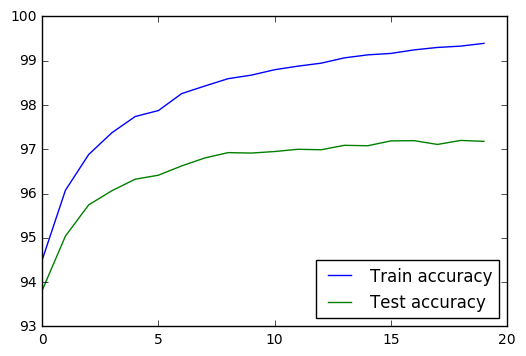

In [12]:
plt.plot(accuracy[:,0], label='Train accuracy')
plt.plot(accuracy[:,1], label='Test accuracy')
plt.legend(loc='lower right')
plt.show()

### Problem 4a: $N$-alternating points problem

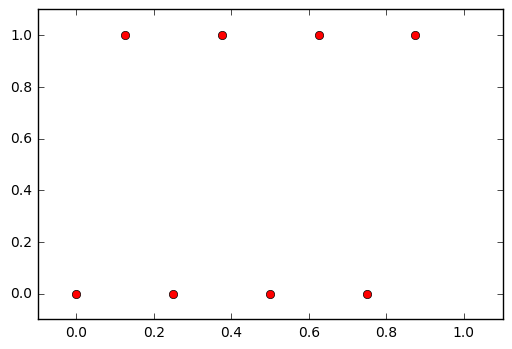

In [13]:
N = 3
X = np.linspace(0, 1-2**(-N), num=2**N).reshape(2**N,1)
y = np.empty((2**N,1))
y[::2] = 0  # even entries are 0
y[1::2] = 1 # odd entries are 1

plt.plot(X,y, 'ro')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

In [14]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],50) # Using 2 Nodes
        self.weights2   = np.random.rand(50,4)
        self.weights3   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        #print(self.input.shape,self.weights1.shape)
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights3 = np.dot(self.layer2.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights2 = np.dot(self.layer1.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T) * sigmoid_derivative(self.layer2)))
        d_weights1 = np.dot(self.input.T,  (np.dot(np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights3.T), self.weights2.T) * sigmoid_derivative(self.layer1))   )

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3

In [15]:
X = np.array([[0],
              [.125],
              [.25],
              [.375],
              [.5],
              [.625],
              [.75],
              [.875]])
y = np.array([[0],[1],[0],[1],[0],[1],[0],[1]])
nn = NeuralNetwork(X,y)

for i in range(5000):
    nn.feedforward()
    nn.backprop()

print('Prediction:\n',nn.output)

Prediction:
 [[0.01610322]
 [0.9587566 ]
 [0.0519372 ]
 [0.81680254]
 [0.54959983]
 [0.50829397]
 [0.50225523]
 [0.50091038]]


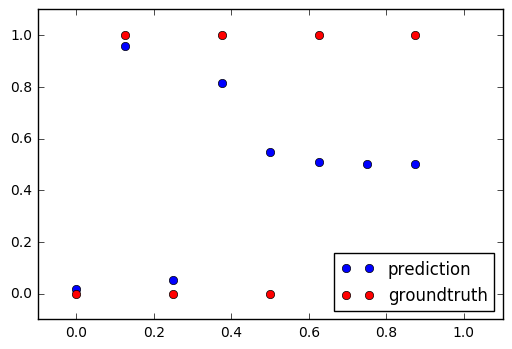

In [16]:
plt.plot(X, nn.output, 'bo', label = 'prediction')
plt.plot(X, y, 'ro', label = 'groundtruth')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.legend(loc='lower right')
plt.show()